# Decision Tree and Random Forest

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

Data is taken from 
<a href="https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression">link</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

In [2]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.corr()["TenYearCHD"].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64

In [8]:
df.isnull().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

<AxesSubplot:>

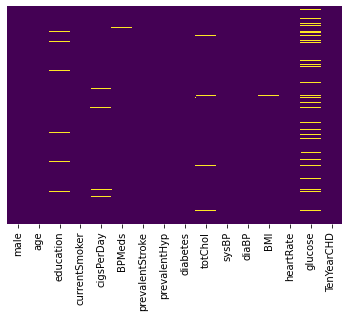

In [9]:
sns.heatmap(df.isnull(), yticklabels= False, cbar=False,cmap='viridis')

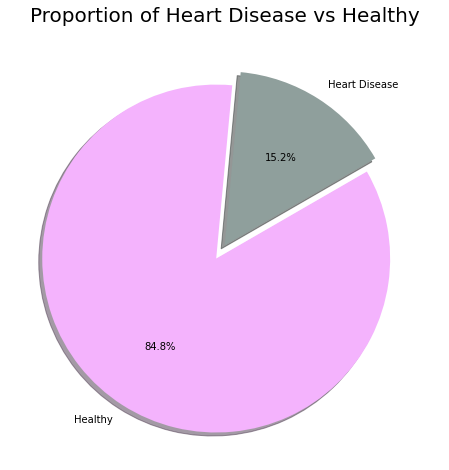

In [10]:
labels = 'Heart Disease', 'Healthy'
sizes = [df.TenYearCHD[df["TenYearCHD"]==1].count(), df.TenYearCHD[df["TenYearCHD"]==0].count()]
explode = (0, 0.09)
colors = ['#8f9f9c','#f4b3fd']
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=30, colors=colors)
#ax1.axis('equal')
plt.title("Proportion of Heart Disease vs Healthy", size = 20)
plt.show()

In [11]:
# sns.set_palette("Set1", 8, .75)
sns.set_style('whitegrid')

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

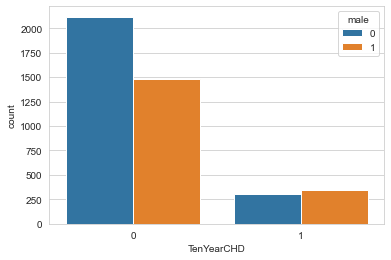

In [12]:
sns.countplot(x = 'TenYearCHD', hue = 'male', data= df )

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

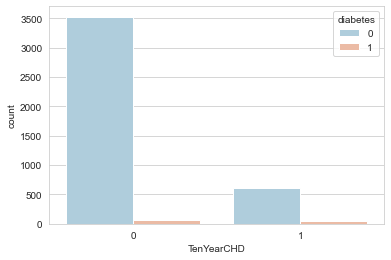

In [13]:
sns.countplot(x = 'TenYearCHD', hue = 'diabetes', data= df, palette='RdBu_r' )

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

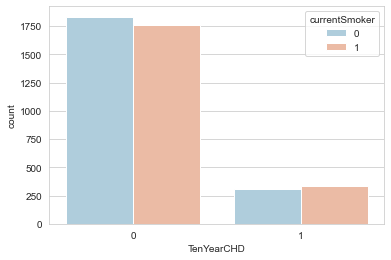

In [14]:
sns.countplot(x = 'TenYearCHD', hue = 'currentSmoker', data= df, palette='RdBu_r' )

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

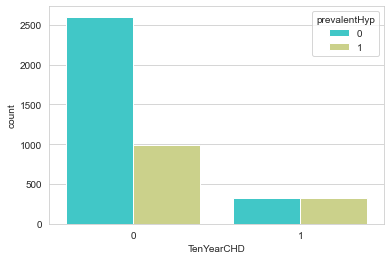

In [15]:
sns.countplot(x = 'TenYearCHD', hue = 'prevalentHyp', data= df, palette='rainbow' )

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

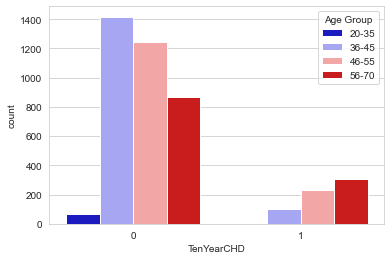

In [17]:
df['Age Group'] = pd.cut(df['age'],bins=[20,35,45,55,71],labels=['20-35','36-45','46-55','56-70'])
df.head()
sns.countplot(x = 'TenYearCHD', hue = 'Age Group', data= df, palette='seismic' )

In [18]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age Group
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,36-45
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,46-55
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,46-55
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,56-70
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,46-55


In [21]:
df['BMI'].iplot(kind='hist',bins=50,color='green')

### Cleaning the data
**Imputation: Replacing the missing data with some substitute value to retain most of the data/information of the dataset**

In [22]:
newdf = df[(df['BPMeds']==1)]
newdf.describe()
newdf

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age Group
13,0,41,3.0,0,0.0,1.0,0,1,0,332.0,124.0,88.0,31.31,65.0,84.0,0,36-45
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1,46-55
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1,46-55
154,0,38,3.0,1,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0,36-45
158,0,49,3.0,0,0.0,1.0,0,1,0,254.0,191.0,124.5,28.35,78.0,54.0,0,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,0,56,2.0,0,0.0,1.0,0,1,0,260.0,158.0,102.5,26.89,90.0,88.0,0,56-70
4158,0,69,2.0,0,0.0,1.0,0,1,0,220.0,143.0,81.0,26.27,60.0,77.0,0,56-70
4168,0,62,1.0,0,0.0,1.0,0,1,0,325.0,180.0,108.0,35.16,75.0,81.0,0,56-70
4194,1,65,1.0,1,20.0,1.0,0,1,0,246.0,179.0,96.0,19.34,95.0,76.0,1,56-70


**it turns out that BPMeds and prevalentHyp are following the same trend**

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

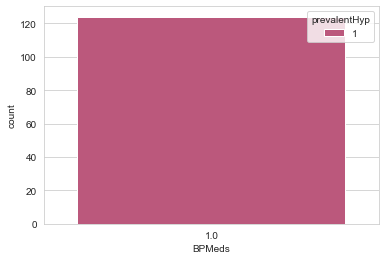

In [23]:
sns.countplot(x = 'BPMeds', hue = 'prevalentHyp', data= newdf, palette='plasma' )

In [24]:
def impute_func(cols):
    BPmeds = cols[0]
    prev = cols[1]
    if pd.isnull(BPmeds):
        if prev == 1:
            return 1
        else:
            return 0
    else:
        return BPmeds

In [25]:
df['BPMeds'] = df[['BPMeds', 'prevalentHyp']].apply(impute_func,axis=1)

<AxesSubplot:>

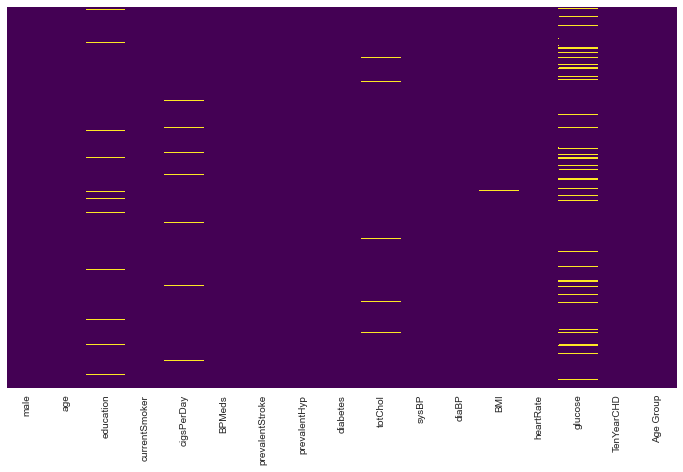

In [26]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), yticklabels= False, cbar=False,cmap='viridis')

**we drop the NA data from columns except for glucose**

In [27]:
# isnull==False and notnull==True (both work)
DF = df[(pd.isnull(df["education"])==False) & (pd.notnull(df["cigsPerDay"])==True)& (pd.notnull(df["BMI"])==True)
       & (pd.notnull(df["totChol"])==True) & (pd.notnull(df["heartRate"])==True)]
DF

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age Group
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,36-45
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,46-55
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,46-55
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,56-70
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,46-55
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,46-55
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,46-55
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0,36-45


<AxesSubplot:>

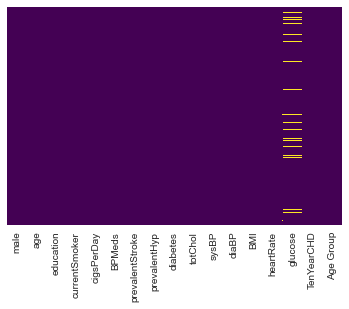

In [28]:
sns.heatmap(DF.isnull(), yticklabels= False, cbar=False,cmap='viridis')

In [30]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer( strategy='most_frequent')
imp.fit(DF[['glucose']])
imputed_df = imp.transform(DF[['glucose']])

imputed_df

array([[ 77.],
       [ 76.],
       [ 70.],
       ...,
       [ 86.],
       [ 75.],
       [107.]])

In [36]:
arrey = []
for i in imputed_df:
    arrey.append(i[0])
arrey[0:5]

[77.0, 76.0, 70.0, 103.0, 85.0]

In [37]:
DF['glucose']= arrey

In [38]:
## the other way to make it :  df["glucose"].fillna(df["glucose"].mean(),inplace =True)

In [39]:
DF.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age Group
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,36-45
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,46-55
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,46-55
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,56-70
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,46-55


<AxesSubplot:>

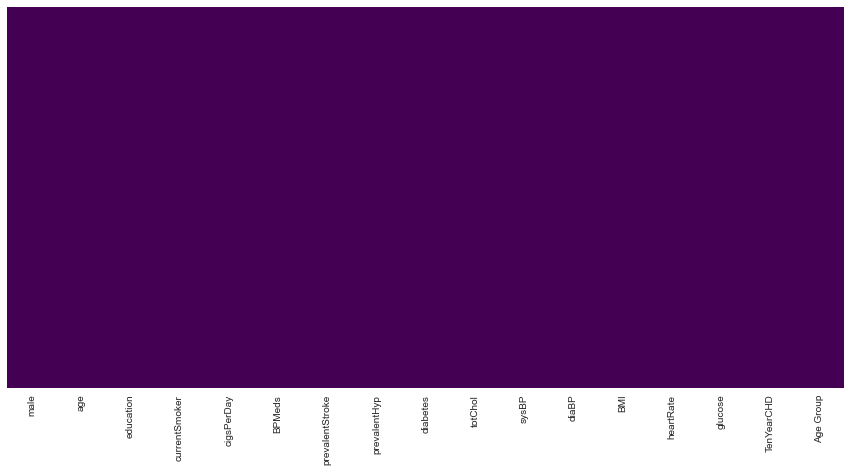

In [40]:
plt.figure(figsize=(15, 7))
sns.heatmap(DF.isnull(), yticklabels= False, cbar=False,cmap='viridis')

** Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [45]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
feat = ss.fit_transform(DF.drop(['TenYearCHD','Age Group'], axis=1))
feat = pd.DataFrame(feat,columns=df.columns[:-2])
feat

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.148303,-1.231851,1.977291,-0.980628,-0.756031,-0.188788,-0.075678,-0.671797,-0.161767,-0.944194,-1.195012,-1.080540,0.293864,0.342285,-0.187760
1,-0.870850,-0.412732,0.018910,-0.980628,-0.756031,-0.188788,-0.075678,-0.671797,-0.161767,0.302043,-0.513255,-0.157180,0.725042,1.586576,-0.231432
2,1.148303,-0.178698,-0.960281,1.019754,0.922192,-0.188788,-0.075678,-0.671797,-0.161767,0.188749,-0.217828,-0.241122,-0.105465,-0.072478,-0.493463
3,-0.870850,1.342523,0.998101,1.019754,1.761303,-0.188788,-0.075678,1.488544,-0.161767,-0.264428,0.804807,1.018005,0.688294,-0.902006,0.947708
4,-0.870850,-0.412732,0.998101,1.019754,1.173925,-0.188788,-0.075678,-0.671797,-0.161767,1.095103,-0.104202,0.094645,-0.654236,0.757049,0.161615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,1.148303,0.055336,-0.960281,1.019754,-0.672120,-0.188788,-0.075678,1.488544,-0.161767,1.729551,2.122868,0.766179,0.048877,-0.819053,0.205287
4035,1.148303,0.172353,0.998101,1.019754,2.852148,-0.188788,-0.075678,-0.671797,-0.161767,-0.672287,-0.263278,-0.241122,-1.484742,-0.902006,-0.580806
4036,-0.870850,-0.178698,0.018910,1.019754,0.922192,-0.188788,-0.075678,-0.671797,-0.161767,0.256726,-0.058751,-0.912657,-0.923722,0.674096,0.205287
4037,-0.870850,-0.646766,-0.960281,1.019754,0.502636,-0.188788,-0.075678,-0.671797,-0.161767,-0.604311,-0.263278,0.346470,-1.619485,0.840001,-0.275103


## Decision Tree Model

In [59]:
from sklearn.model_selection import train_test_split
x= feat
y=DF['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3 , random_state= 42)

In [60]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
preds1 = model1.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
print(classification_report(y_test,preds1))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1024
           1       0.18      0.18      0.18       188

    accuracy                           0.75      1212
   macro avg       0.52      0.52      0.52      1212
weighted avg       0.75      0.75      0.75      1212



In [63]:
print(confusion_matrix(y_test,preds1))

[[878 146]
 [155  33]]


In [64]:
print(accuracy_score(y_test,preds1))

0.7516501650165016


## Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=400)
model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=400)

In [75]:
preds2 = model2.predict(x_test)

In [76]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
print(classification_report(y_test,preds2))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1024
           1       0.65      0.08      0.14       188

    accuracy                           0.85      1212
   macro avg       0.75      0.54      0.53      1212
weighted avg       0.82      0.85      0.80      1212



In [77]:
print(confusion_matrix(y_test,preds2))

[[1016    8]
 [ 173   15]]


In [78]:
print(accuracy_score(y_test,preds2))

0.8506600660066007


**for a problem such as disease diagnosis, the number of TP is critical. Here, the random forest model was able to detect more TP samples, which is the power of this algorithm over the decision tree**